In [5]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
df = pd.read_csv('E:\Pythonproject\heart.csv')
df.shape

Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.19.5
pandas version: 1.3.2
matplotlib version: 3.2.2


(303, 14)

In [7]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
df.target.value_counts() # df.target.unique()

1    165
0    138
Name: target, dtype: int64

In [9]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

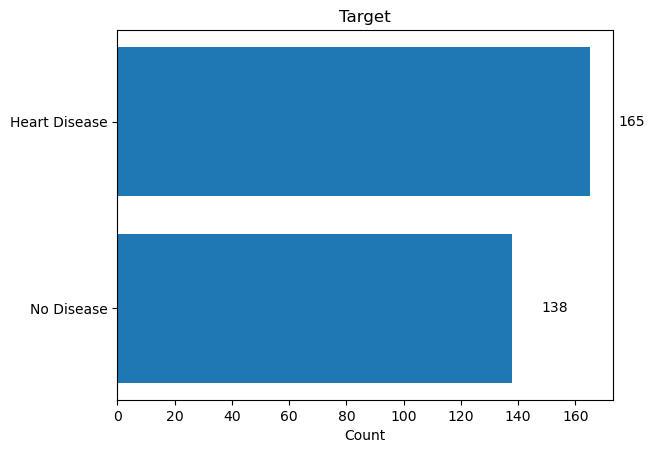

In [10]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

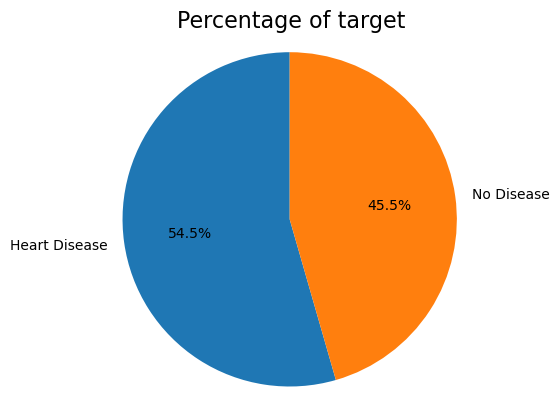

In [11]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [12]:
df.isna().sum() # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [14]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

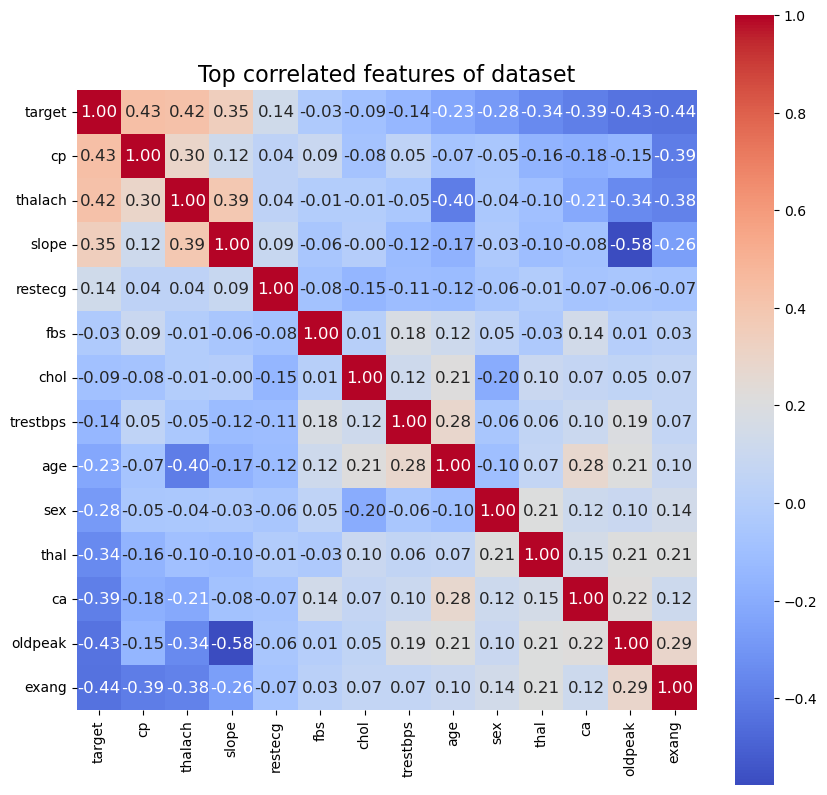

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [16]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

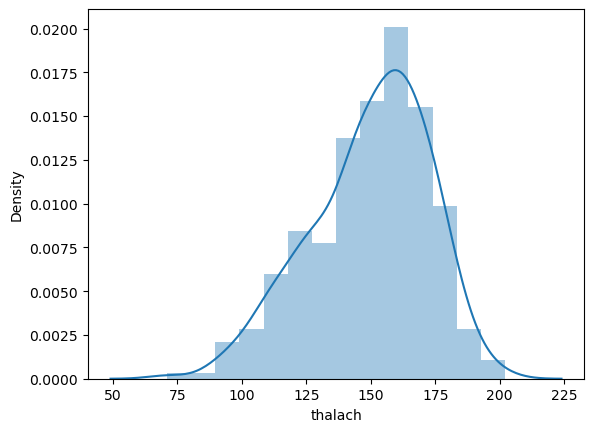

In [17]:
ax = sns.distplot(df['thalach']) # histogram distribution

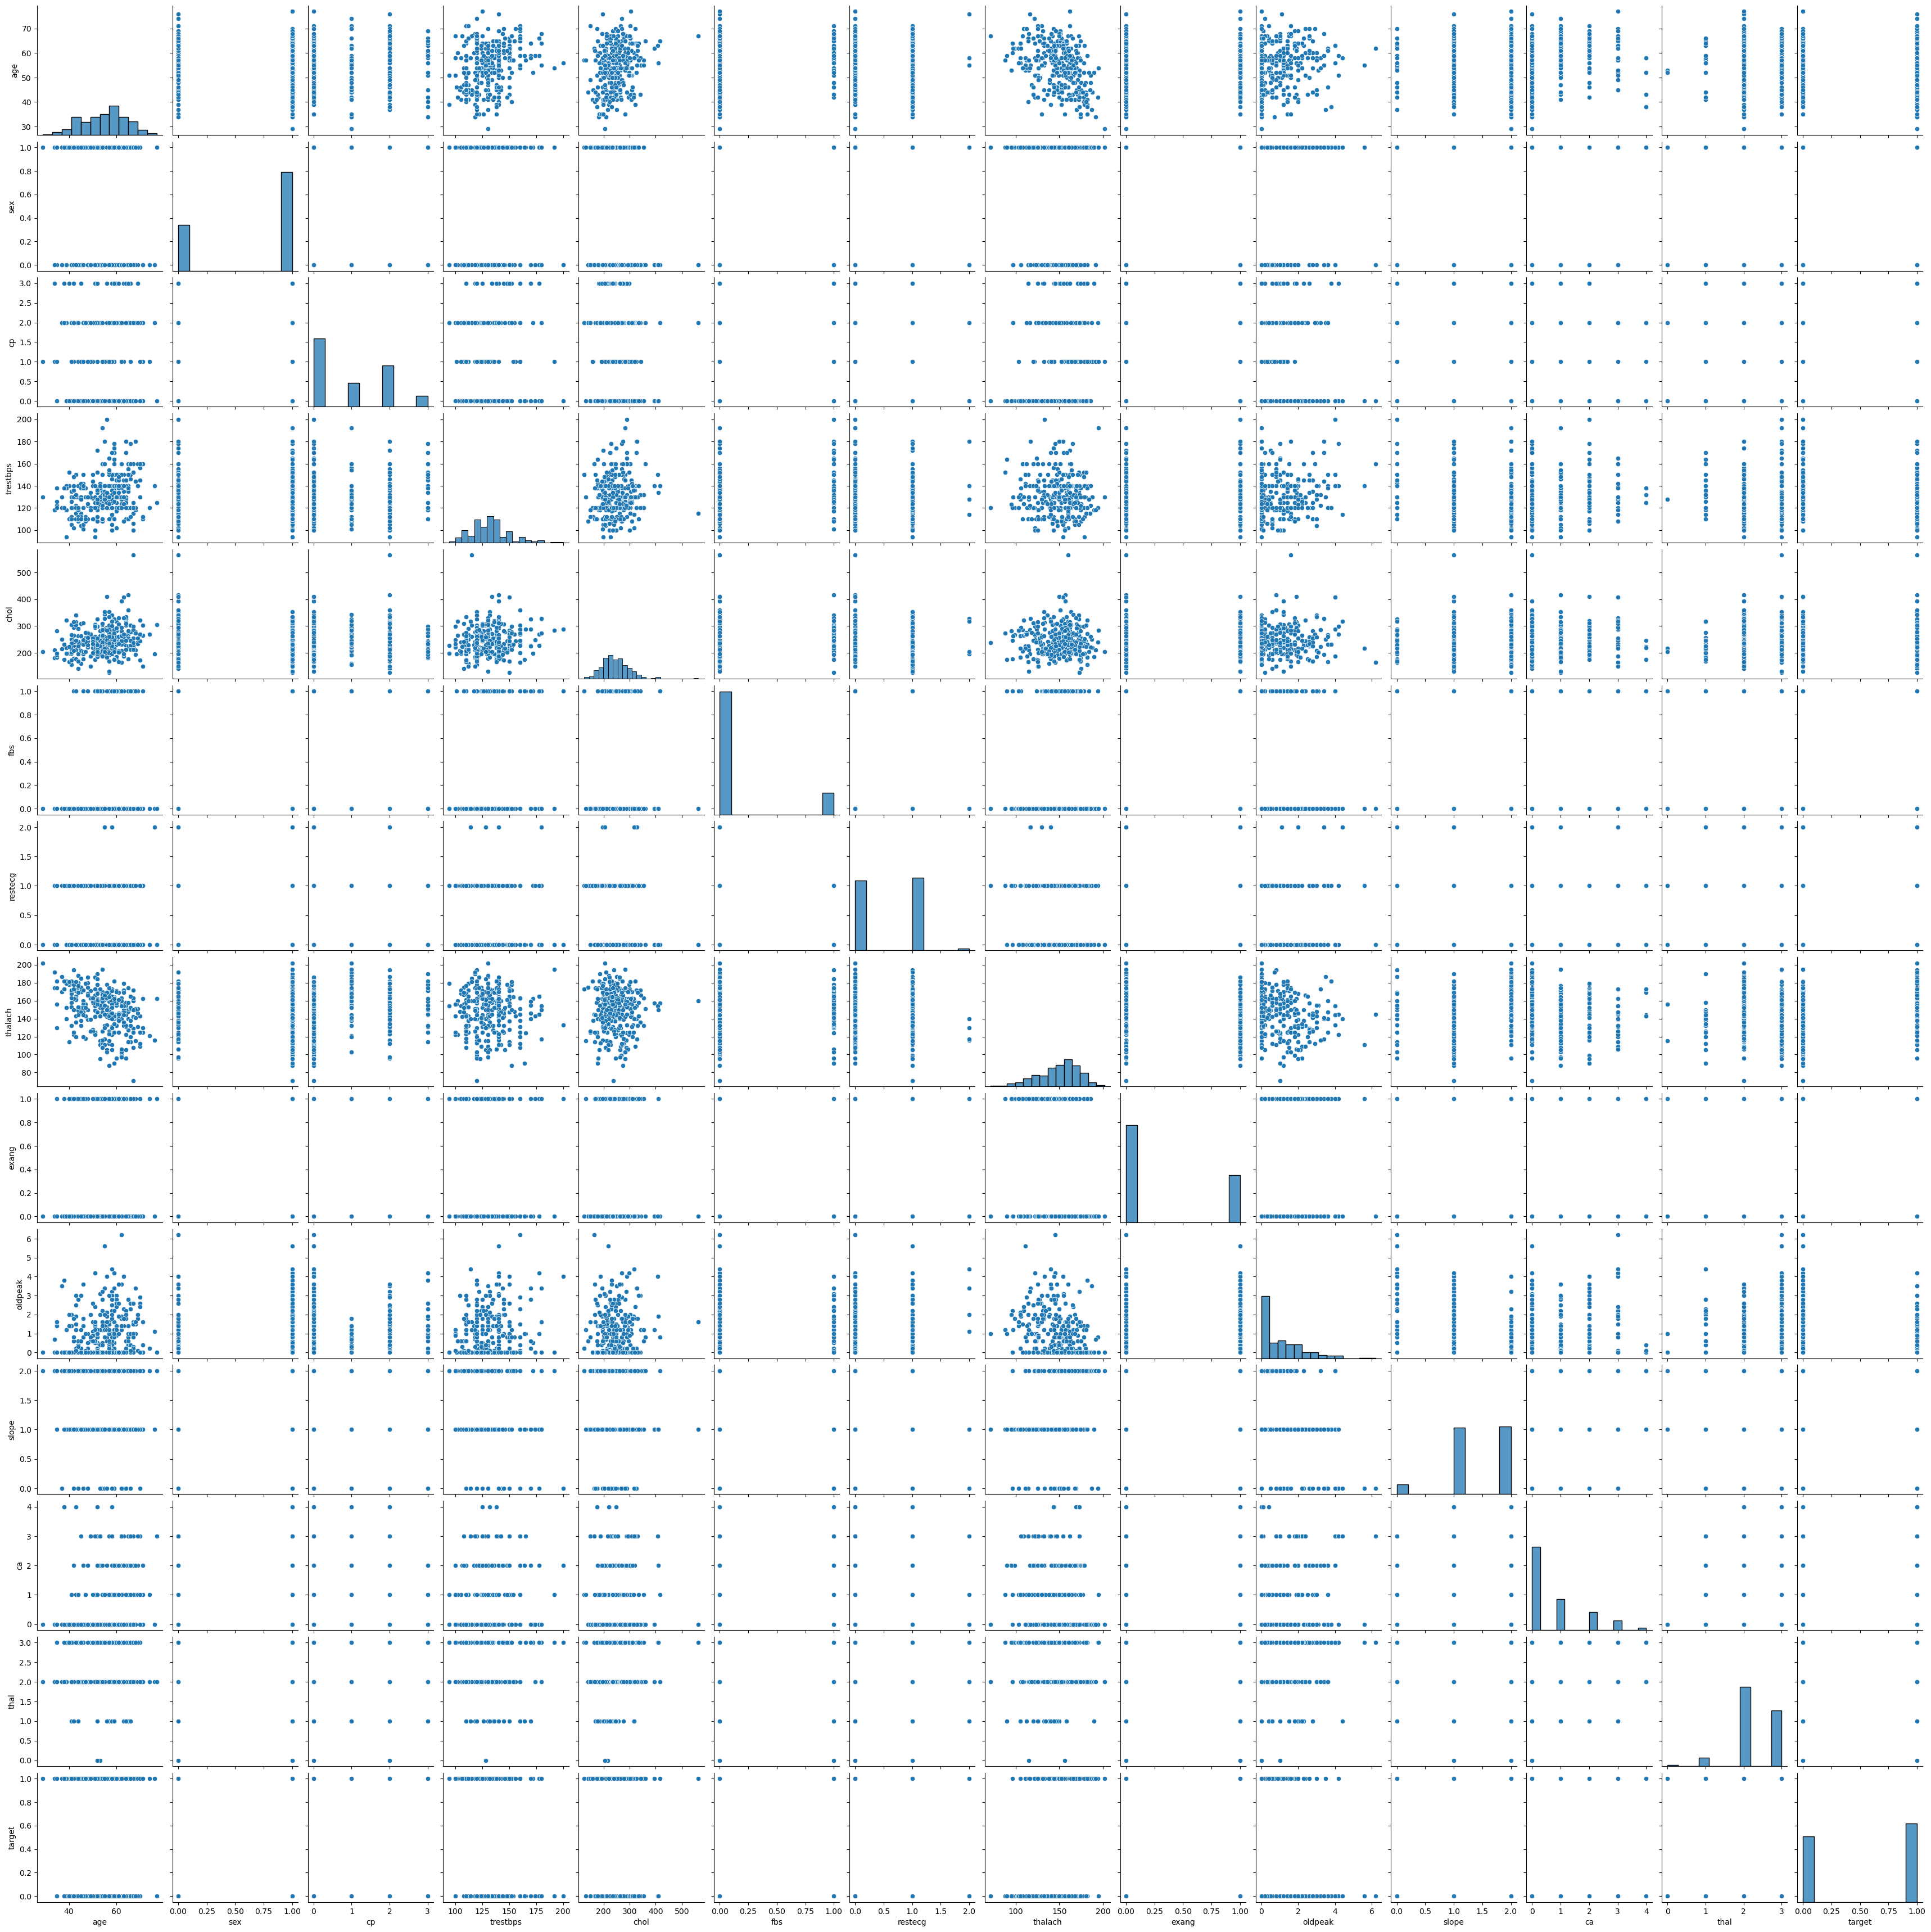

In [20]:
sns.pairplot(df)

In [21]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (242, 13) (242,)
shape of X and y respectively (test) : (61, 13) (61,)


In [23]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8388429752066116
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



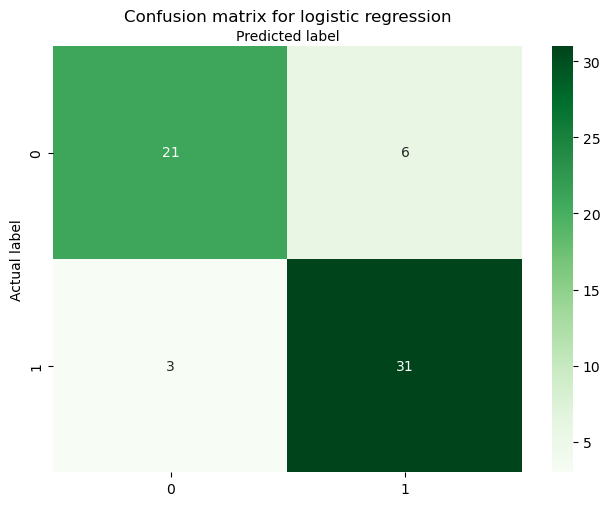

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

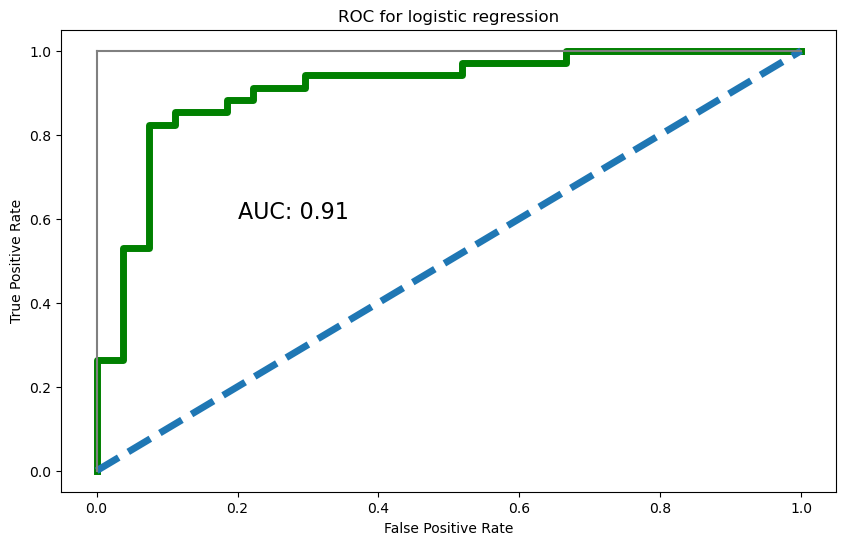

In [25]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, y_train)  
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.8388429752066116
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



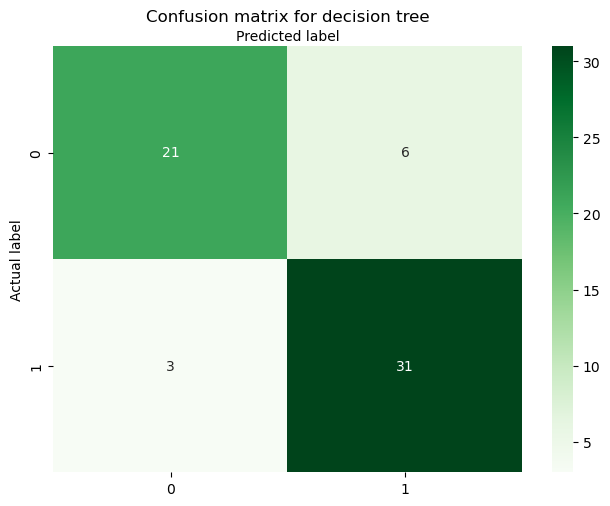

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

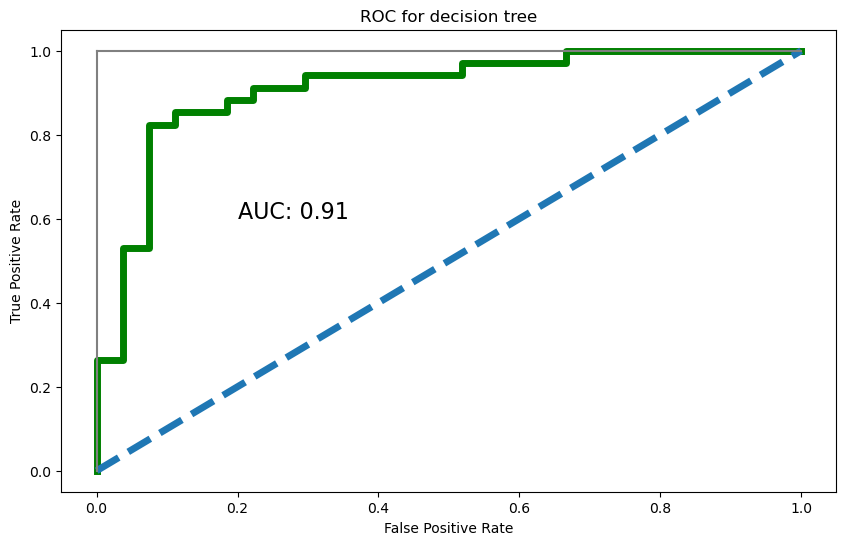

In [28]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [29]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8852459016393442
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



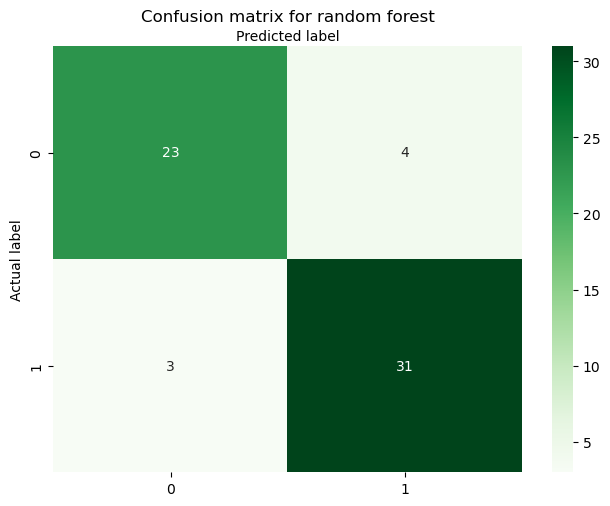

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

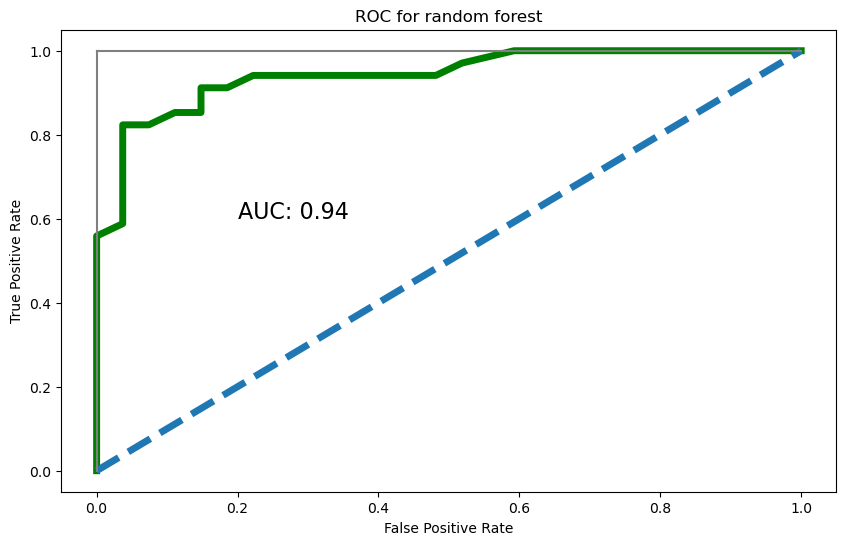

In [31]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8524590163934426
Testing Score: 0.639344262295082
   Predicted
0          0
1          0
2          1
3          0
4          1
% of people predicted with heart-disease: 0.5245901639344263
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



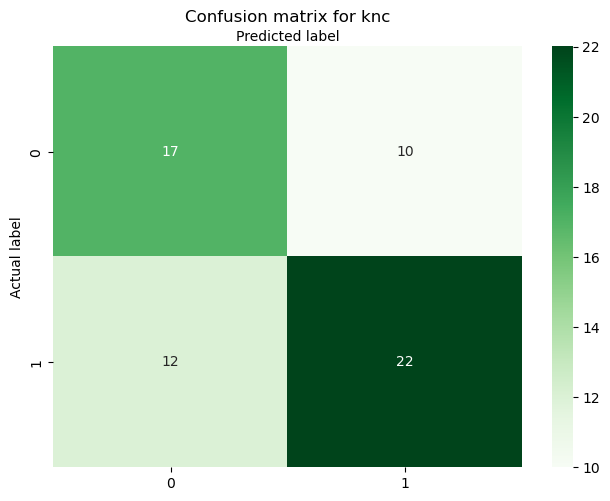

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

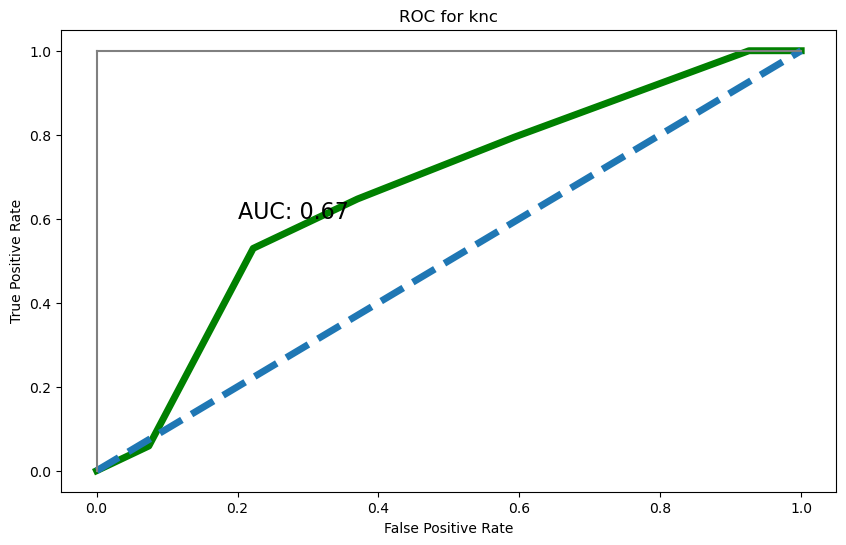

In [34]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

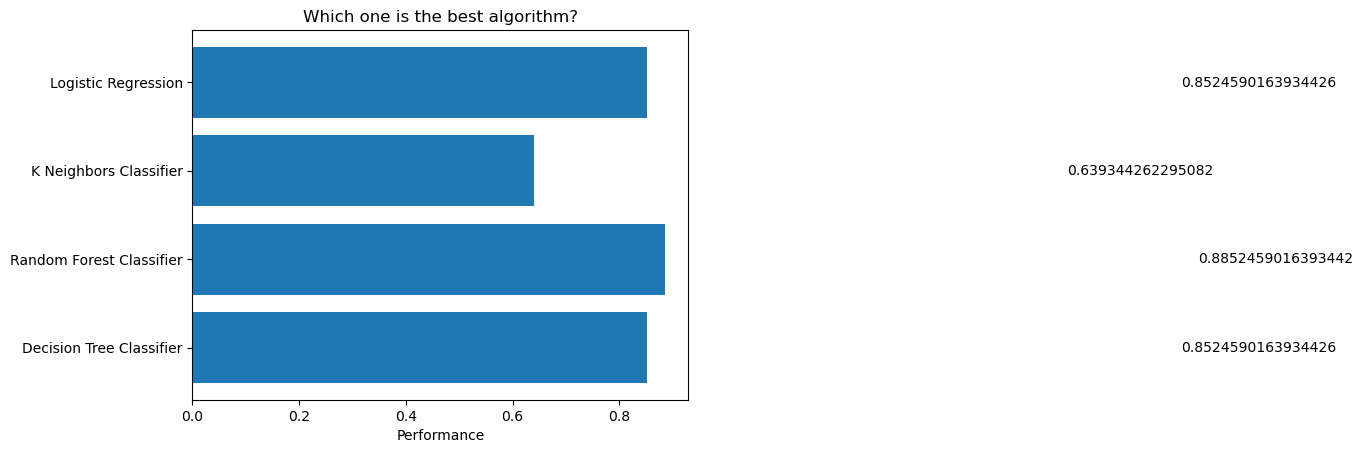

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()
